# Basic GP optimizer - clean mutinormal example

**Note**: In order to use it on a specific machine, you should build machine interface (setX and get_state functions).


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pickle
import numpy as np
from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
from modules.OnlineGP import OGP
import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
sys.path.insert(1, '/home/cz489/STEMalign_BO/GPTrelated')
saveResultsQ = False

failed to import parallelstuff


### Creat the machine interface

In [2]:
ndim = 2 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
start_point = [0.25,0.5]  # use H1 = H2 = 25 as default start, following Cameron's setup
#min-max range

#creat machine interface
mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
# mi_module = importlib.import_module('multinormal')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1

In [3]:
mi.x

array([[0.25, 0.5 ]])

In [4]:
#check the reading objective is working
mi.getState()

outscope.txt


StopIteration: 

In [13]:
#check noise std
y = [mi.getState()[1][0] for x in range(100)]
np.std(y)

outscope.txt


KeyboardInterrupt: 

### Create the gp

In [25]:
gp_ls = np.array(np.ones(ndim))
gp_amp = 10 # default = 1
gp_noise = 0.01  # default = 0.001

gp_precisionmat =  np.array(np.diag(1/(gp_ls**2)))
hyps = [gp_precisionmat, np.log(gp_amp), np.log(gp_noise**2)] #format the hyperparams for the OGP

gp = OGP(ndim, hyps,prmean=0)

### Create the BO

In [26]:
#create the bayesian optimizer that will use the gp as the model to optimize the machine 
opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids)
opt.ucb_params = np.array([2, None])

target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7f2b74291c88>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
outscope.txt
simulation finished
x_init [[0.25 0.5 ]]
y_init [[17.69127999]]
Using prior mean function of  0
Using prior mean parameters of  None


**Running BO**

*run the gp search for some number of steps*

In [27]:
Obj_state_s=[]

iteration = 19
outscope.txt
simulation finished
current position: [[0.25 0.5 ]] current objective value: [17.69127999]


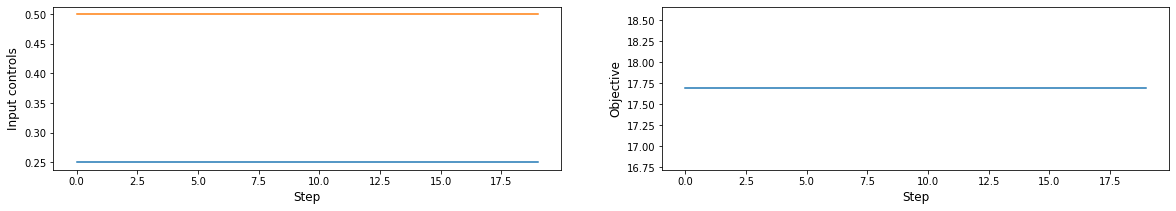

[0.25 0.5 ]
[0.25 0.5 ]
[[0.25 0.5 ]]
outscope.txt
simulation finished


/nfs/user/cz489/venv/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/nfs/user/cz489/venv/lib64/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
Niter = 20
for i in range(Niter):
    clear_output(wait=True) 
    print ('iteration =', i)
   
    Obj_state_s.append(mi.getState()[1][0])
    print ('current position:', mi.x, 'current objective value:', Obj_state_s[-0])
    
    f = plt.figure(figsize=(20,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.set_ylabel('Input controls',fontsize=12)
    ax.set_xlabel('Step',fontsize=12)    
    ax.plot(opt.X_obs)
    ax2.set_ylabel('Objective',fontsize=12)
    ax2.set_xlabel('Step',fontsize=12)
    ax2.plot(Obj_state_s)
    plt.show(); 
    
    opt.OptIter()

In [19]:
opt.model.predict(np.array([0,0],ndmin=2))

(array([[17.68510877]]), array([[0.00020504]]))

In [20]:
#save results if desired
from datetime import datetime
import time
def saveResults(filename):
    timestr = datetime.now().strftime('%Y-%m-%d-%H%M%S')
    try: os.mkdir('saved_results/multinormal')
    except: pass
    results = {}
    results['start_point'] = start_point
    results['hyps'] = [gp_precisionmat,gp_amp, gp_noise]
    results['offset'] = offset
    results['xs'] = opt.X_obs
    results['ys'] = np.array([y[0][0] for y in opt.Y_obs])
    results['time'] = timestr
    np.save('saved_results/multinormal/scan_'+timestr+'_'+filename, results)
    print('saved to:  saved_results/GPT/  scan_'+timestr+'_'+filename)

In [21]:
saveResults('exmple1')

NameError: name 'offset' is not defined